In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

Source Code:
https://mapattack.wordpress.com/2017/02/12/using-python-for-stocks-1/

In [40]:
import pandas as pd
import numpy as np
list=["^DJI.csv","^GSPC.csv","^IXIC.csv","^RUT.csv" ,"^TNX.csv"]
def graph(a):
    data = pd.read_csv(a)
    df= pd.DataFrame(data)
    df=df.set_index('Date')
    df['Adj Close'].plot(legend=True, figsize=(10, 5), title='Adjusted Closing Price', label=a.split('.')[0])
   

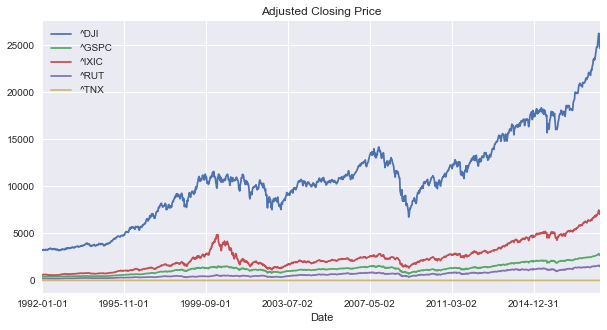

In [44]:
#graph adjusted closing price
for i in list:
    graph(i)

In [45]:

import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [82]:
def graph_lr(a):
    data = pd.read_csv(a)
    df = data[['Date','Adj Close']]
    lr_df=df
    lr_df['Adj Close Price'] = lr_df['Adj Close']    
    lr_df['x'] = np.arange(len(lr_df))  # create x-col of continuous integers

    lr_df = lr_df.dropna()    # Drop the rows that contain missing days
    lin_reg = LinearRegression()
    lin_reg.fit(X=lr_df['x'].values[:, np.newaxis], y=lr_df['Adj Close Price'].values[:, np.newaxis])
    
    lr_df['Prediction'] = lin_reg.predict(lr_df['x'].values[:, np.newaxis])     # Make predictions w.r.t. 'x' and store it in a column called 'Prediction'
    t= a.split('.')[0]+ ' ' + 'Adjusted Closing Price Linear Regression'
    lr_df[['Adj Close Price', 'Prediction','Date']].plot(legend=True, figsize=(10, 5), title=t, x='Date')


/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


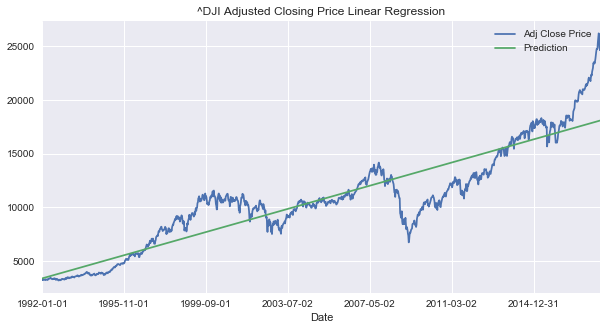

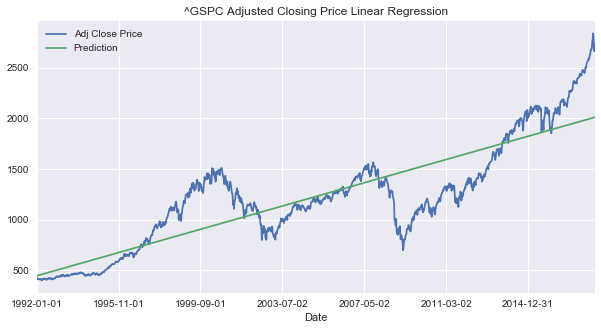

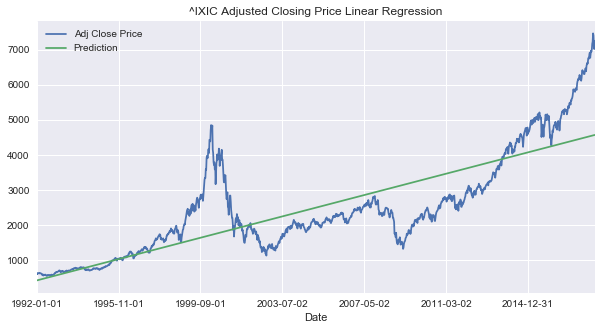

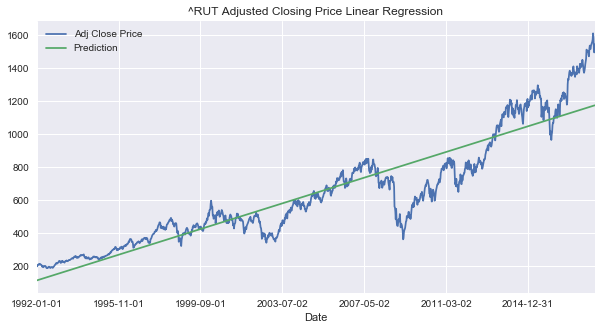

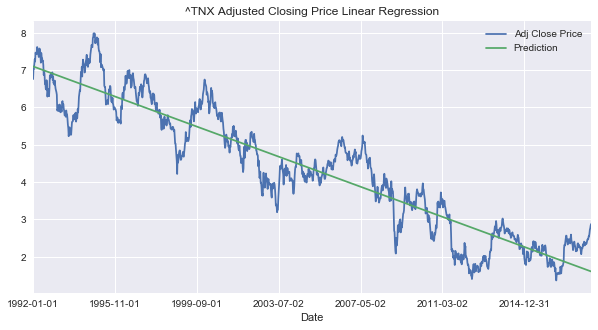

In [83]:
#graph linear regression
for i in list:
    graph_lr(i)

In [75]:
#linear regression for prediction
data = pd.read_csv("^GSPC.csv")
df = data[['Adj Close']]
forecast_col = 'Adj Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
print('length of X_train and x_test: ', len(X_train), len(X_test))

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print("Accuracy of Linear Regression: ", confidence)

/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


length of X_train and x_test:  1080 270
Accuracy of Linear Regression:  0.971565353843


/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
